In [6]:
#conda install opencv
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 5.5 MB/s eta 0:00:0000:0100:01


In [115]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [116]:
path ='/home/luvsue94/luvsue94/open cv image/lane1.jpg'

In [117]:
def show_img(image_path,tile='image'):
    image=cv2.imread(image_path)
    image_rgb =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    if image is None:
        print("엑박")
        return
    
    plt.figure()
    plt.imshow(image_rgb)
    plt.title(tile)
    plt.axis('off')
    plt.show()
    plt.close()

In [118]:
def show_img_channel(image_path,tile='image',i=0):
    image=cv2.imread(image_path)
    image_rgb =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    if image is None:
        print("엑박")
        return
    
    plt.figure()
    plt.imshow(image_rgb[:,:,i])
    plt.title(tile)
    plt.axis('off')
    plt.show()
    plt.close()

In [119]:
def show_img_gray(image_path,tile='image'):
    image=cv2.imread(image_path)
    image_rgb =cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    if image is None:
        print("엑박")
        return
    
    plt.figure()
    plt.imshow(image_rgb[:,:,i])
    plt.title(tile)
    plt.axis('off')
    plt.show()
    plt.close()

In [120]:
path ='/home/luvsue94/luvsue94/open cv image/lane1.jpg'

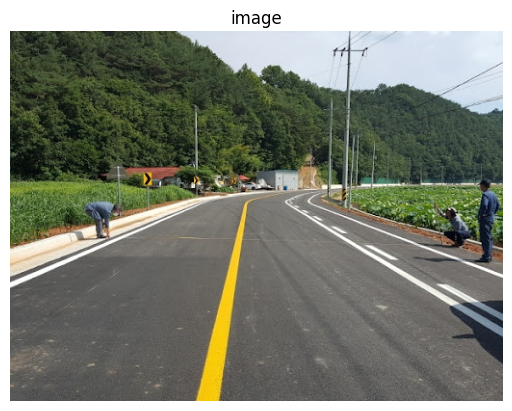

In [121]:
show_img(path)

In [108]:
path ='/home/luvsue94/luvsue94/open cv image/lane1.jpg'
image = cv2.imread(path)

In [109]:
image_pil=Image.fromarray(image)
image_pil.show()

In [56]:
image_pil.show()

In [124]:
display(image)  #왜 이미지가 출력되고  행렬이 출력되지? 이미지 타입이 넘파이라서

array([[[ 30,  49,  40],
        [ 43,  62,  53],
        [ 34,  55,  46],
        ...,
        [247, 235, 223],
        [246, 234, 222],
        [245, 233, 221]],

       [[ 23,  42,  33],
        [ 26,  45,  36],
        [ 31,  52,  43],
        ...,
        [247, 235, 223],
        [246, 234, 222],
        [246, 234, 222]],

       [[ 26,  45,  36],
        [ 22,  41,  32],
        [ 42,  61,  52],
        ...,
        [247, 235, 223],
        [246, 234, 222],
        [246, 234, 222]],

       ...,

       [[ 95,  96,  94],
        [ 87,  88,  86],
        [ 88,  89,  87],
        ...,
        [ 98, 102, 103],
        [ 93,  97,  98],
        [104, 108, 109]],

       [[ 90,  91,  89],
        [ 88,  89,  87],
        [ 88,  89,  87],
        ...,
        [ 83,  87,  88],
        [ 92,  96,  97],
        [103, 107, 108]],

       [[ 88,  89,  87],
        [ 90,  91,  89],
        [ 86,  87,  85],
        ...,
        [ 89,  94,  93],
        [ 97, 102, 101],
        [ 84,  89,  88]]

In [125]:
plt.close()

In [31]:
type(image)  #왜 넘파이냐?

numpy.ndarray

In [32]:
image.shape #(y,x,z)

(384, 512, 3)

In [33]:
image.size #픽셀수

589824

In [34]:
b,g,r =image[100,100]
print(b,g,r)

39 65 52


In [126]:
#특정 채널 가져오기, imread BGR
blue=image[ : , : , 0]
green=image[ : , : , 1]
red=image[ : , : , 2]

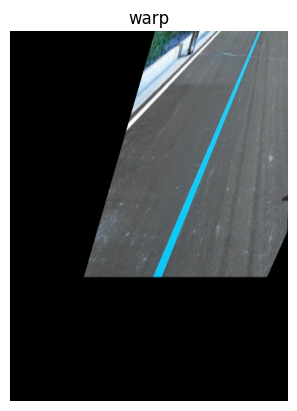

In [181]:
point1 = np.float32([
    [0,200], #왼쪽아래               #사진크기[384,512]를 위치 조정 
    [1000,200],  # 오른쪽 아래
    [100,500],  #왼쪽 위
    [1000,500]  #오른쪽 위
])
    
point2 = np.float32([
    [200,0],
    [800,0],
    [100,500],
    [500,500]
])
    
matrix = cv2.getPerspectiveTransform(point1,point2)
warp_image=cv2.warpPerspective(image,matrix,[384, 512])   # [384,512]는 사진크기
plt.figure()
plt.imshow(warp_image)
plt.title("warp")
plt.axis('off')
plt.show()
plt.close()


In [175]:


blurred = cv2.GaussianBlur
edges= cv2.Canny(warp_image,50,150)


<function matplotlib.pyplot.show(close=None, block=None)>

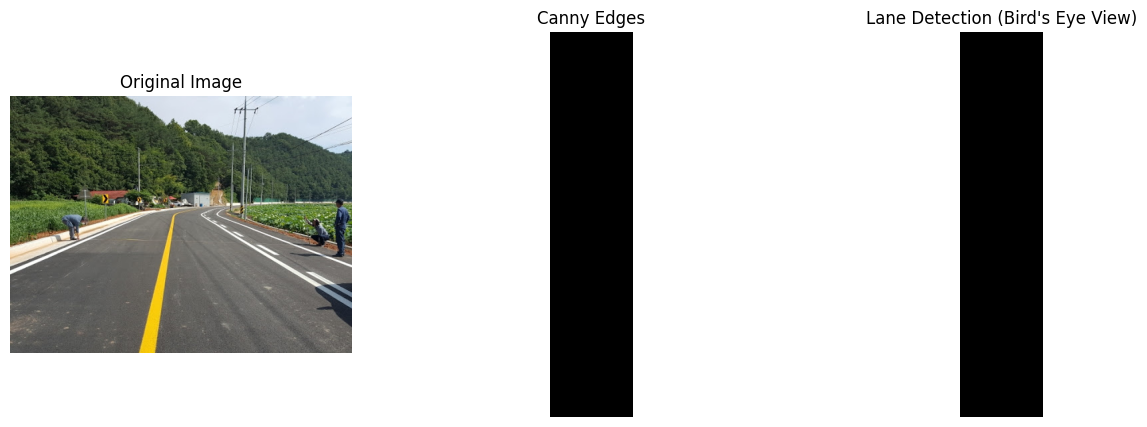

In [174]:
#5. 탑뷰(bird's Eye View로 변환)
warped = cv2.warpPerspective(image,matrix,(124,576))

#6. Grayscale 변환
gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)

#7. 가우시안 블러 적용(노이즈 제거)
blurred = cv2.GaussianBlur(gray,(5,5),0)

#8.Canny Edge Detection 적용(엣지 검출)
edges =cv2.Canny(blurred,50,150)

#9. Hough Line Transform으로 차선 검출
lines = cv2.HoughLinesP(edges,1,np.pi/180,threshold=100, minLineLength=50,maxLineGap=50)

#10.검출된 차선을 탑뷰 이미지에 그리기 
line_image = np.copy(warped)
if lines is not None:
    for line in lines:
        x1,y1,x2,y2=line[0]
        cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),2)

#11.Matplotlib을 사용해 원본, 탑뷰, 검출된 이미지 표시     
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(edges,cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(line_image,cv2.COLOR_BGR2RGB))
plt.title('Lane Detection (Bird\'s Eye View)')
plt.axis('off')

plt.show

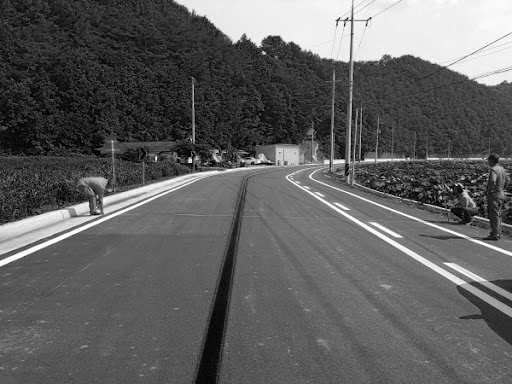

In [58]:
red_pil = Image.fromarray(blue)
display(red_pil)

In [60]:
# # plt.imshow(red)
# # plt.imshow(green)
# plt.imshow(blue)

In [40]:
plt.close()
plt.clf()

<Figure size 640x480 with 0 Axes>

In [41]:
#흑백으로 변경
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

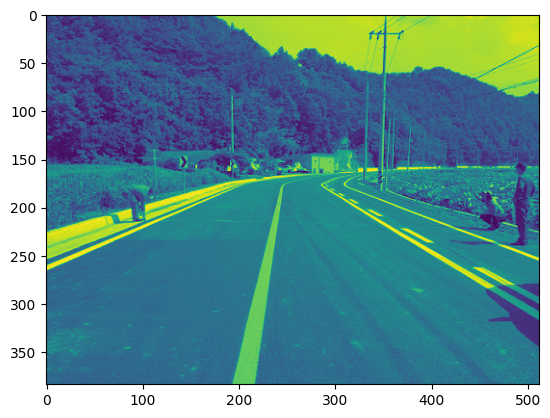

In [42]:
plt.imshow(gray)